In [161]:
import plotly as px
import plotly.graph_objects as go 


import plotly.express as px



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [162]:
data=pd.read_csv('StudentsPerformance.csv',delimiter=',')

data.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
575,male,group A,associate's degree,free/reduced,completed,40,55,53
576,male,group A,some college,standard,completed,61,51,52
236,male,group D,bachelor's degree,free/reduced,none,63,66,67
639,female,group D,associate's degree,standard,none,76,74,73


In [163]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [164]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [165]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [166]:
race_ethicnicy=data['race/ethnicity'].value_counts()

In [167]:
#Let's visualization the groups

race_ethicnicy=data['race/ethnicity'].value_counts()

fig=px.bar(x = race_ethicnicy.index, y = race_ethicnicy.values , color= race_ethicnicy.values, text= race_ethicnicy.values )
fig.layout.title.text= 'Bar Plot for Race/Ethnicity '
fig.update_traces(textposition='outside')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [168]:
#Donut Chart for parental level of education	

lev_edu=data['parental level of education'].value_counts()

colors=['#8BC34A','#D4E157','#FFB300','#FF7043',"#E43D3D","#A1A1A1"]

donut=go.Pie(values = lev_edu.values , labels=lev_edu.index , marker=dict(colors=colors), textinfo='label+percent' , hole=0.6 , pull= [0,0,0,0,0,0.1] )

layout=go.Layout(title=dict(text='Level of Education ', x=.50,y=.90,font_size=30))

fig=go.Figure(data=donut,layout=layout)

fig.show()

### Bivariate analysis

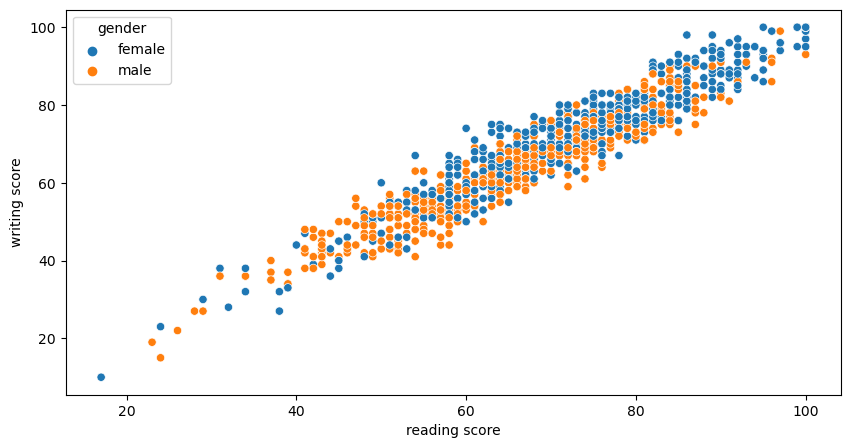

In [169]:
#Who most succesful in writing and reading


plt.figure(figsize=(10,5))
sns.scatterplot(x=data['reading score'],y=data['writing score'],hue=data.gender)
plt.show()

In [170]:
#Bubble Chart - more complex - 

scatter=px.scatter(data,x='writing score',y='reading score',size='math score',color='parental level of education',hover_name='gender',size_max=30) #hover_name = feature to show when the cursor comes up



fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

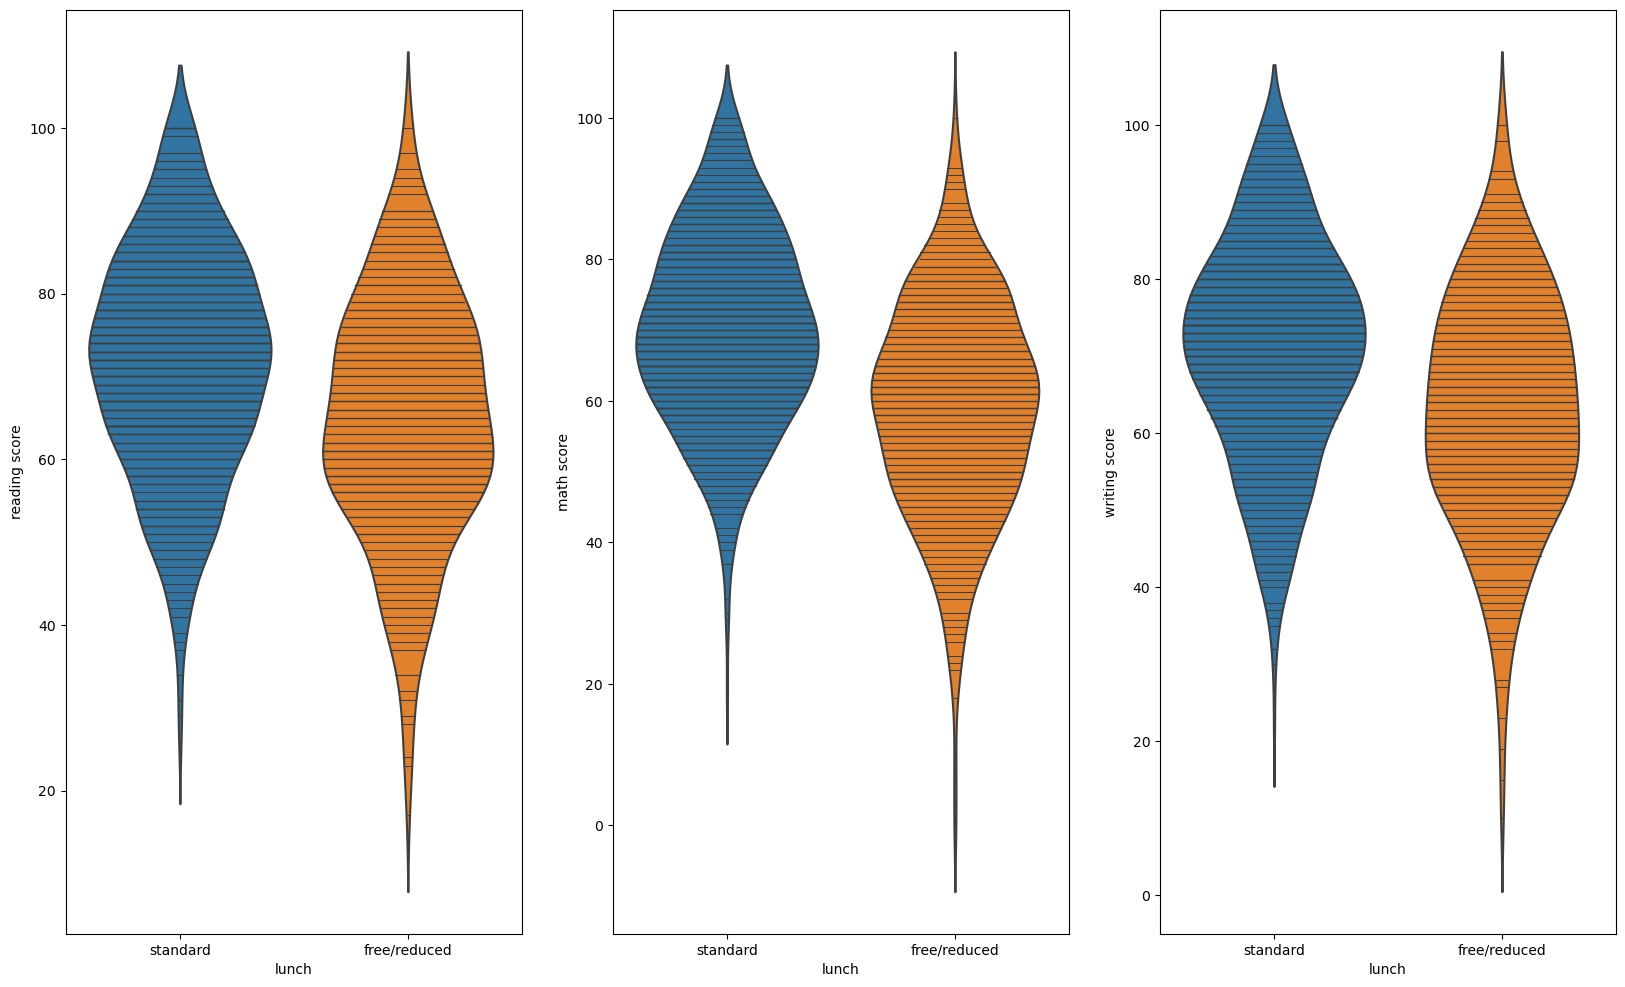

In [171]:
#Let's look at  the effect lunch on math-reading and writing scores.


plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.violinplot(x='lunch',y='reading score' , data=data, inner='stick')

plt.subplot(1,3,2)
sns.violinplot(x='lunch',y='math score' , data=data, inner='stick')

plt.subplot(1,3,3)
sns.violinplot(x='lunch',y='writing score' , data=data, inner='stick')


plt.show()

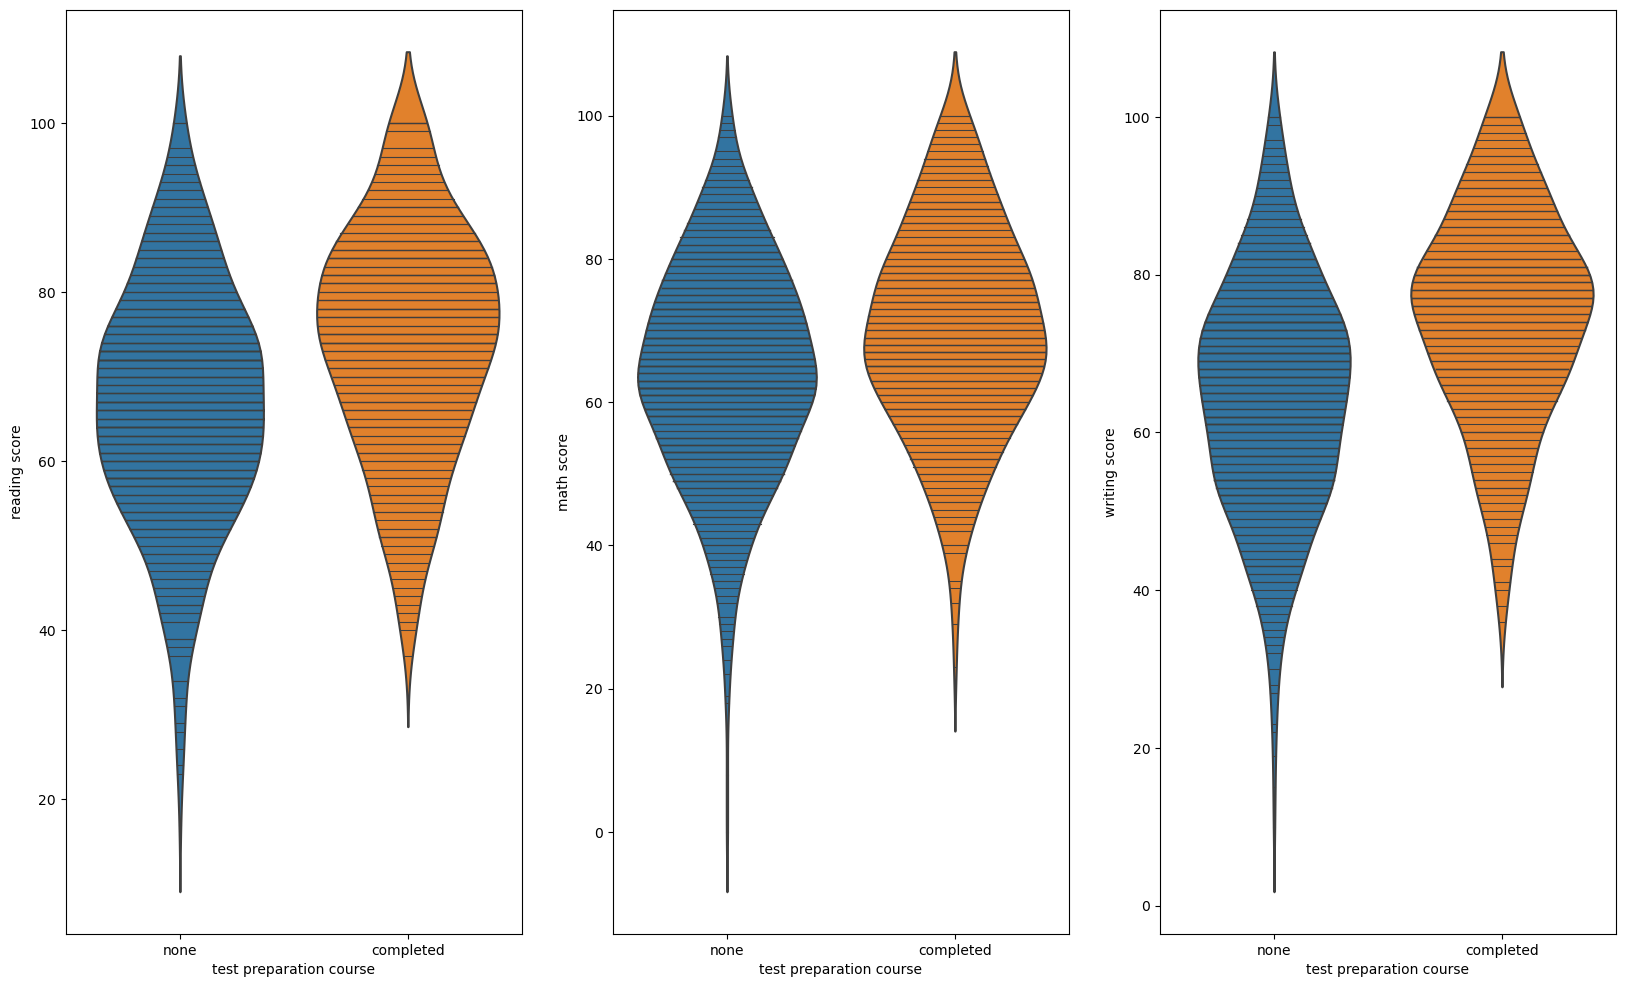

In [172]:
#Let's look at  the effect test preparation course on math-reading and writing scores.

plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.violinplot(x='test preparation course',y='reading score' , data=data, inner='stick')

plt.subplot(1,3,2)
sns.violinplot(x='test preparation course',y='math score' , data=data, inner='stick')

plt.subplot(1,3,3)
sns.violinplot(x='test preparation course',y='writing score' , data=data, inner='stick')


plt.show()

In [173]:
#Bar chart -All ethicny groups in all parental level of education

order=data.groupby('race/ethnicity')["parental level of education"].value_counts()

order_df=order.reset_index(name='count')

In [174]:
x1=order_df['race/ethnicity'].unique()


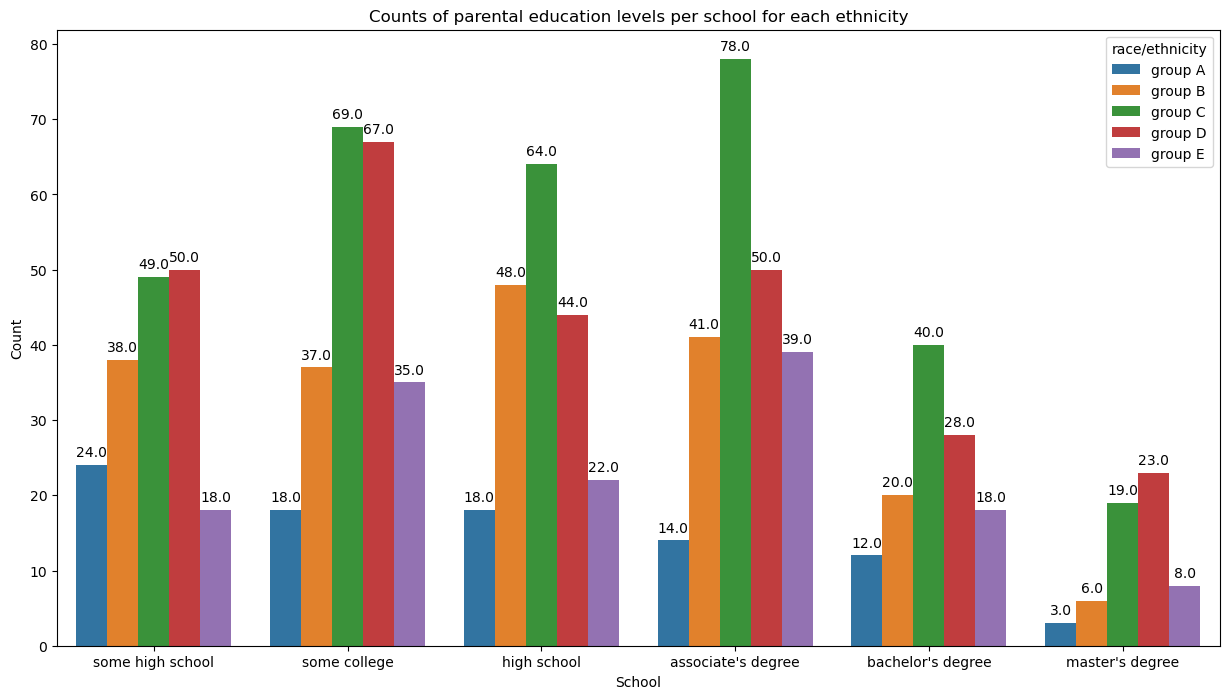

In [175]:
#Bar chart 
plt.figure(figsize=(15,8))
barplot = sns.barplot(x='parental level of education', y='count', hue='race/ethnicity', data=order_df)
plt.title('Counts of parental education levels per school for each ethnicity')
plt.ylabel('Count')
plt.xlabel('School')

# Adding the counts on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


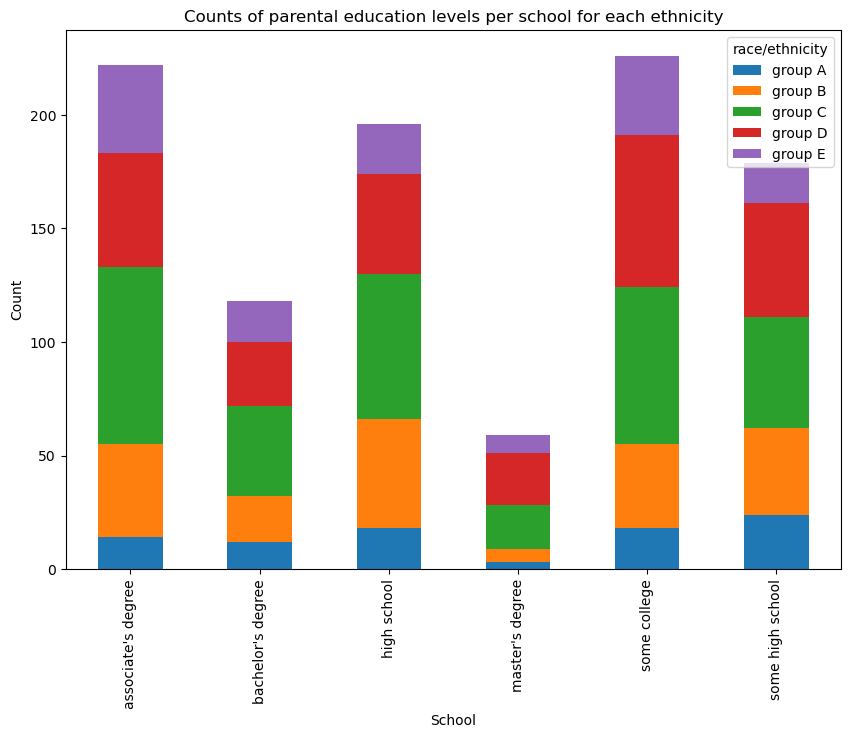

In [176]:
pivot_df = order_df.pivot(index='parental level of education', columns='race/ethnicity', values='count')

# Replace NaNs with 0
pivot_df = pivot_df.fillna(0)

# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Counts of parental education levels per school for each ethnicity')
plt.ylabel('Count')
plt.xlabel('School')

plt.show()

In [177]:
#Done!